In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.applications.inception_v3 import preprocess_input

import os
import cv2
from os import walk
import glob as gb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 1000
IMG_SIZE = 224
BATCH_SIZE = 32

TRAIN_DIR = 'C:/Users/Ankur Saha/Thesis/Caltech Bird/Train'
VALID_DIR = 'C:/Users/Ankur Saha/Thesis/Caltech Bird/Validation'
TEST_DIR = 'C:/Users/Ankur Saha/Thesis/Caltech Bird/Test'

In [3]:
from glob import glob
training_dir=TRAIN_DIR
validation_dir=VALID_DIR
image_files = glob(training_dir + '/*/*')
valid_image_files = glob(validation_dir + '/*/*')

In [4]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 199


In [5]:
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import InceptionV3

#IMG_SIZE=80

IMAGE_SIZE = [IMG_SIZE, IMG_SIZE] 


En = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) 


for layer in En.layers:
    layer.trainable = False

x = Flatten()(En.output)

x = Dense(num_classes, activation = 'softmax')(x)  

model = Model(inputs = En.input, outputs = x)

87924736/87910968 [==============================] - 50s 1us/step


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [7]:
training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(
    training_dir, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    class_mode = 'sparse')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    class_mode = 'sparse')

Found 8190 images belonging to 199 classes.
Found 2311 images belonging to 199 classes.


In [8]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 40:
        lr *= 0.5e-3
    elif epoch > 30:
        lr *= 1e-3
    elif epoch > 20:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=lr_schedule(0)), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Learning rate:  0.001


C:\Users\Ankur Saha\.conda\envs\CVPR\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
h = model.fit(training_generator, 
              epochs=50,
              steps_per_epoch = 8190 // BATCH_SIZE,
              validation_data = validation_generator,
              validation_steps = 2311 // BATCH_SIZE,
              callbacks=lr_scheduler,
              verbose=2
             )

Learning rate:  0.001
Epoch 1/50
255/255 - 75s - loss: 8.7979 - accuracy: 0.0202 - val_loss: 8.7807 - val_accuracy: 0.0330 - lr: 0.0010 - 75s/epoch - 296ms/step
Learning rate:  0.001
Epoch 2/50
255/255 - 67s - loss: 6.6017 - accuracy: 0.1085 - val_loss: 8.5682 - val_accuracy: 0.0356 - lr: 0.0010 - 67s/epoch - 261ms/step
Learning rate:  0.001
Epoch 3/50
255/255 - 67s - loss: 5.6795 - accuracy: 0.1813 - val_loss: 8.5469 - val_accuracy: 0.0447 - lr: 0.0010 - 67s/epoch - 264ms/step
Learning rate:  0.001
Epoch 4/50
255/255 - 67s - loss: 4.9628 - accuracy: 0.2556 - val_loss: 8.6852 - val_accuracy: 0.0499 - lr: 0.0010 - 67s/epoch - 263ms/step
Learning rate:  0.001
Epoch 5/50
255/255 - 70s - loss: 4.4306 - accuracy: 0.3061 - val_loss: 8.2657 - val_accuracy: 0.0603 - lr: 0.0010 - 70s/epoch - 274ms/step
Learning rate:  0.001
Epoch 6/50
255/255 - 70s - loss: 3.7016 - accuracy: 0.3739 - val_loss: 8.6765 - val_accuracy: 0.0621 - lr: 0.0010 - 70s/epoch - 273ms/step
Learning rate:  0.001
Epoch 7/50
2

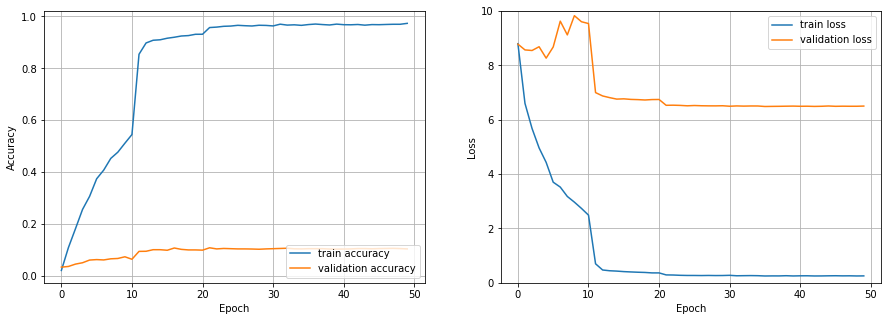

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],  label='train accuracy')
plt.plot(h.history['val_accuracy'],  label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],  label='train loss')
plt.plot(h.history['val_loss'],  label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim([0,10])
plt.legend(loc='upper right')
plt.savefig ("Inception_v3.pdf",dpi=300)
plt.show()